In [2]:
# ==========================================
# Sales Data Preprocessing and Preparation
# ==========================================

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer

In [3]:
# Load the dataset
file_path = "C:\\Users\\ranji\\Documents\\DELL\\Data Analytics & Data Science\\18. 1st June\\sales.csv"
df = pd.read_csv("C:\\Users\\ranji\\Documents\\DELL\\Data Analytics & Data Science\\18. 1st June\\sales.csv", encoding='latin1')




In [5]:
# Select only useful columns for modeling
df = df[['QUANTITYORDERED', 'PRICEEACH', 'STATUS', 'PRODUCTLINE', 'DEALSIZE', 'SALES']]

print("Initial Data:")
print(df.head(), "\n")




Initial Data:
   QUANTITYORDERED  PRICEEACH   STATUS  PRODUCTLINE DEALSIZE    SALES
0               30      95.70  Shipped  Motorcycles    Small  2871.00
1               34      81.35  Shipped  Motorcycles    Small  2765.90
2               41      94.74  Shipped  Motorcycles   Medium  3884.34
3               45      83.26  Shipped  Motorcycles   Medium  3746.70
4               49     100.00  Shipped  Motorcycles   Medium  5205.27 



In [6]:
# Handle missing values
# -----------------------------
df['QUANTITYORDERED'].fillna(df['QUANTITYORDERED'].mean(), inplace=True)
df['PRICEEACH'].fillna(df['PRICEEACH'].median(), inplace=True)
df['STATUS'].fillna('Unknown', inplace=True)
df['PRODUCTLINE'].fillna('Unknown', inplace=True)
df['DEALSIZE'].fillna('Unknown', inplace=True)
df['SALES'].fillna(df['SALES'].median(), inplace=True)

print("After Filling Missing Values:")
print(df.isnull().sum(), "\n")

After Filling Missing Values:
QUANTITYORDERED    0
PRICEEACH          0
STATUS             0
PRODUCTLINE        0
DEALSIZE           0
SALES              0
dtype: int64 



In [7]:
# Encode categorical variables
# -----------------------------
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['STATUS', 'PRODUCTLINE', 'DEALSIZE'], drop_first=True)
print("After Encoding Categorical Variables:")
print(df.head(), "\n")

After Encoding Categorical Variables:
   QUANTITYORDERED  PRICEEACH    SALES  STATUS_Disputed  STATUS_In Process  \
0               30      95.70  2871.00            False              False   
1               34      81.35  2765.90            False              False   
2               41      94.74  3884.34            False              False   
3               45      83.26  3746.70            False              False   
4               49     100.00  5205.27            False              False   

   STATUS_On Hold  STATUS_Resolved  STATUS_Shipped  PRODUCTLINE_Motorcycles  \
0           False            False            True                     True   
1           False            False            True                     True   
2           False            False            True                     True   
3           False            False            True                     True   
4           False            False            True                     True   

   PRODUCTLINE_Pla

In [8]:
# Handle outliers (IQR Method)
# -----------------------------
columns_with_outliers = ['QUANTITYORDERED', 'PRICEEACH', 'SALES']

for col in columns_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_indices = np.where((df[col] < lower_bound) | (df[col] > upper_bound))
    print(f"Outliers Detected in '{col}' at Indices: {outlier_indices[0]}")

    if len(outlier_indices[0]) > 0:
        df.loc[outlier_indices[0], col] = df[col].median()
        print(f"Outliers in column '{col}' replaced with the median.\n")
    else:
        print(f"No outliers detected in '{col}'.\n")

print("After Outlier Handling:")
print(df.describe(), "\n")

Outliers Detected in 'QUANTITYORDERED' at Indices: [ 418  598 1666 1714 1995 1996 2586 2689]
Outliers in column 'QUANTITYORDERED' replaced with the median.

Outliers Detected in 'PRICEEACH' at Indices: []
No outliers detected in 'PRICEEACH'.

Outliers Detected in 'SALES' at Indices: [  30   32   35   41   43   44   50   53   81   86   87   88   90   93
  104  105  131  163  164  165  174  175  186  188  189  191  194  195
  197  198  201  203  211  235  239  241  243  260  264  272  290  318
  319  331  418  473  497  563  593  598  663  667  698  744  840  845
 1014 1015 1018 1023 1030 1047 1061 1062 1133 1137 1153 1188 1251 1558
 1561 1666 1839 1995 1996 2117 2241 2295 2430 2505 2634]
Outliers in column 'SALES' replaced with the median.

After Outlier Handling:
       QUANTITYORDERED    PRICEEACH        SALES
count      2823.000000  2823.000000  2823.000000
mean         34.969890    83.658544  3382.093294
std           9.453839    20.174277  1554.292834
min           6.000000    26.8

In [9]:
# -----------------------------
# Correlation Check
# -----------------------------
print("Correlation Matrix:")
print(df.corr(), "\n")

Correlation Matrix:
                              QUANTITYORDERED  PRICEEACH     SALES  \
QUANTITYORDERED                      1.000000  -0.001940  0.491250   
PRICEEACH                           -0.001940   1.000000  0.690436   
SALES                                0.491250   0.690436  1.000000   
STATUS_Disputed                      0.057309   0.020260  0.020625   
STATUS_In Process                    0.017616  -0.026135 -0.014360   
STATUS_On Hold                       0.050322   0.013187  0.035460   
STATUS_Resolved                      0.004808  -0.024529 -0.024834   
STATUS_Shipped                      -0.041239   0.009488  0.003759   
PRODUCTLINE_Motorcycles              0.010247  -0.011943 -0.015880   
PRODUCTLINE_Planes                  -0.007931  -0.033148 -0.057653   
PRODUCTLINE_Ships                   -0.007606   0.002935 -0.063637   
PRODUCTLINE_Trains                   0.004445  -0.066447 -0.055935   
PRODUCTLINE_Trucks and Buses         0.026236   0.066272  0.061827   


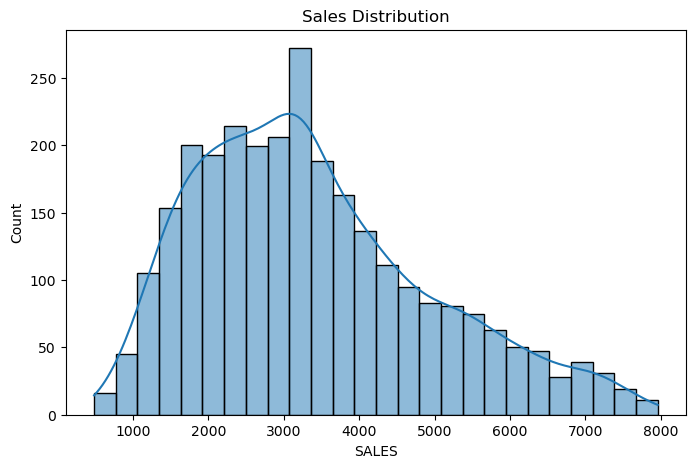

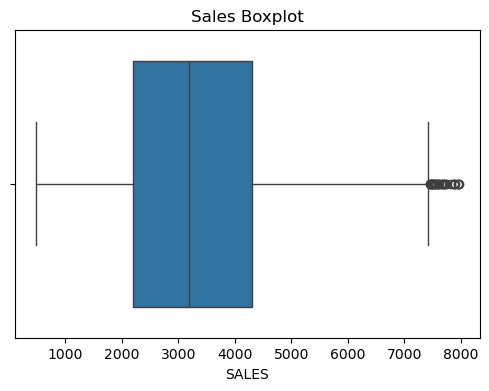

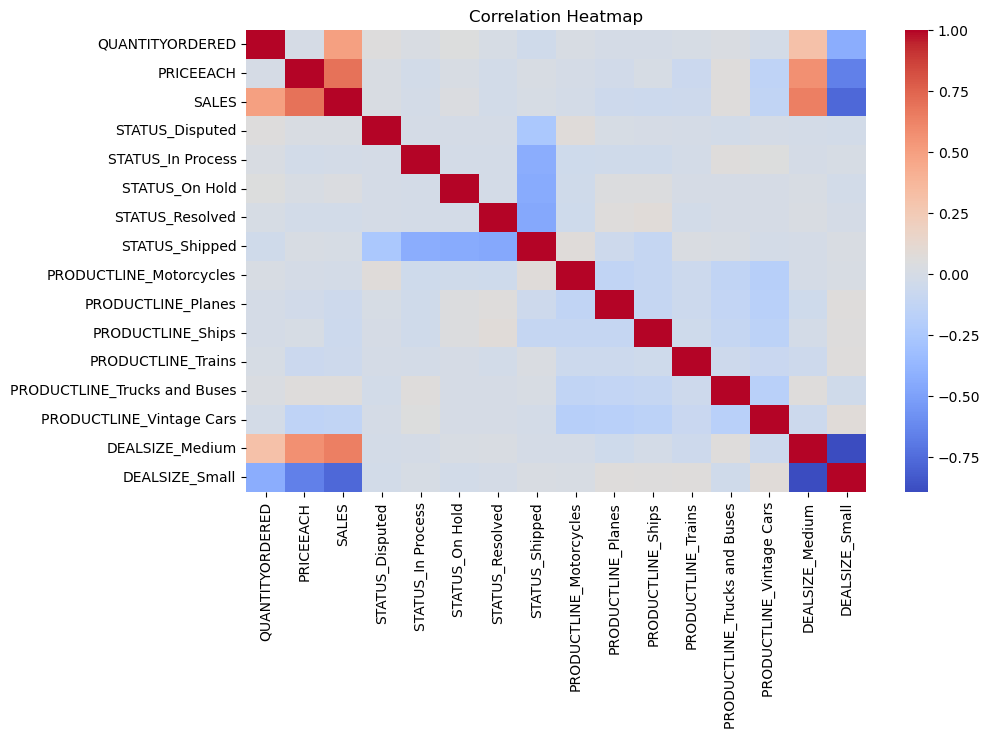

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Sales Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['SALES'], kde=True)
plt.title("Sales Distribution")
plt.show()

# 2️⃣ Sales Boxplot (Outlier View)
plt.figure(figsize=(6,4))
sns.boxplot(x=df['SALES'])
plt.title("Sales Boxplot")
plt.show()

# 3️⃣ Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [8]:
# -----------------------------
# Split the data
# -----------------------------
X = df.drop(['SALES'], axis=1)
y = df['SALES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features (X_train):")
print(X_train.head(), "\n")
print("Training Labels (y_train):")
print(y_train.head(), "\n")

Training Features (X_train):
      QUANTITYORDERED  PRICEEACH  STATUS_Disputed  STATUS_In Process  \
927                41      29.87            False              False   
2206               43      39.43            False              False   
781                34      90.39            False              False   
695                30      61.15            False              False   
1029               50     100.00            False              False   

      STATUS_On Hold  STATUS_Resolved  STATUS_Shipped  \
927            False            False            True   
2206           False            False            True   
781            False            False            True   
695            False            False            True   
1029           False            False            True   

      PRODUCTLINE_Motorcycles  PRODUCTLINE_Planes  PRODUCTLINE_Ships  \
927                     False               False              False   
2206                     True               False  

In [9]:
# -----------------------------
# Scaling and Normalization
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print("Scaled Training Data (first 5 rows):\n", X_train_scaled[:5], "\n")

normalizer = Normalizer()
X_train_normalized = normalizer.fit_transform(X_train)
print("Normalized Training Data (first 5 rows):\n", X_train_normalized[:5])

print("\n✅ Data preprocessing completed successfully! Ready for regression modeling.")

Scaled Training Data (first 5 rows):
 [[ 0.63856617 -2.66871662 -0.06669632 -0.1120538  -0.12728559 -0.12907038
   0.27054374 -0.36775514 -0.34806887 -0.303981   -0.16236883 -0.34244515
   1.89951659 -0.9850541   1.09189423]
 [ 0.85024971 -2.19421519 -0.06669632 -0.1120538  -0.12728559 -0.12907038
   0.27054374  2.71920063 -0.34806887 -0.303981   -0.16236883 -0.34244515
  -0.52644973 -0.9850541   1.09189423]
 [-0.10232621  0.3351355  -0.06669632 -0.1120538  -0.12728559 -0.12907038
   0.27054374 -0.36775514  2.87299467 -0.303981   -0.16236883 -0.34244515
  -0.52644973  1.01517266 -0.91583962]
 [-0.52569329 -1.11616384 -0.06669632 -0.1120538  -0.12728559 -0.12907038
   0.27054374 -0.36775514 -0.34806887 -0.303981   -0.16236883 -0.34244515
   1.89951659 -0.9850541   1.09189423]
 [ 1.5911421   0.81211863 -0.06669632 -0.1120538  -0.12728559 -0.12907038
   0.27054374 -0.36775514 -0.34806887 -0.303981   -0.16236883 -0.34244515
  -0.52644973 -0.9850541  -0.91583962]] 

Normalized Training Data